# Taxi Data Analysis and Hypothesis Testing

# Introduction

In this project, we are performing an **Exploratory Data Analysis (EDA)** and testing a hypothesis using three datasets related to taxi rides in Chicago. The objective is to understand patterns in the data, create insightful visualizations, and test a specific hypothesis related to ride durations.

# Datasets:
We have the following three datasets for our analysis:

1. **Taxi Companies and Rides**:  
   `/datasets/project_sql_result_01.csv`  
   Contains data about taxi companies and the number of rides they completed on **November 15-16, 2017**:
   - `company_name`: The name of the taxi company.
   - `trips_amount`: The total number of rides for each company.

2. **Dropoff Locations and Average Trips**:  
   `/datasets/project_sql_result_04.csv`  
   Contains data about Chicago neighborhoods and the average number of rides that ended in each neighborhood for the entire **November 2017**:
   - `dropoff_location_name`: The name of the neighborhood.
   - `average_trips`: The average number of rides ending in each neighborhood.

3. **Rides from Loop to O'Hare International Airport**:  
   `/datasets/project_sql_result_07.csv`  
   Contains data on taxi rides specifically between **the Loop** and **O'Hare International Airport**, including:
   - `start_ts`: The pickup date and time.
   - `weather_conditions`: The weather at the time the ride started.
   - `duration_seconds`: The ride duration in seconds.

### Project Goals:
1. **Exploratory Data Analysis**:
   - Study the data from the two datasets on taxi companies and neighborhoods.
   - Ensure the data types are appropriate for analysis.
   - Identify the **top 10 neighborhoods** by number of drop-offs.
   - Create visualizations:
     - A graph showing the number of rides for each taxi company.
     - A graph of the top 10 neighborhoods by the number of drop-offs.
   - Draw conclusions from the data and visualizations.

2. **Hypothesis Testing**:
   - Test the hypothesis:  
     **"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**
   - Formulate null and alternative hypotheses.
   - Choose the appropriate statistical test and explain the reasoning behind it.
   - Perform the test and draw conclusions.

Let's begin by loading the datasets and inspecting their structure.


## EDA

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the datasets
taxi_data = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhood_data = pd.read_csv('/datasets/project_sql_result_04.csv')


In [11]:
taxi_data.info()
taxi_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [12]:
neighborhood_data.info()
neighborhood_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [13]:
# Check for duplicates in the taxi_data
taxi_duplicates = taxi_data[taxi_data.duplicated()]
print(f"Number of duplicate rows in taxi_data: {taxi_duplicates.shape[0]}")

# Display the duplicate rows, if any
if taxi_duplicates.shape[0] > 0:
    print("Duplicate rows in taxi_data:")
    print(taxi_duplicates)

# Check for duplicates in the neighborhood_data
neighborhood_duplicates = neighborhood_data[neighborhood_data.duplicated()]
print(f"Number of duplicate rows in neighborhood_data: {neighborhood_duplicates.shape[0]}")

# Display the duplicate rows, if any
if neighborhood_duplicates.shape[0] > 0:
    print("Duplicate rows in neighborhood_data:")
    print(neighborhood_duplicates)


Number of duplicate rows in taxi_data: 0
Number of duplicate rows in neighborhood_data: 0


In [14]:
# Identify the top 10 neighborhoods by number of drop-offs
top_10_neighborhoods = neighborhood_data.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


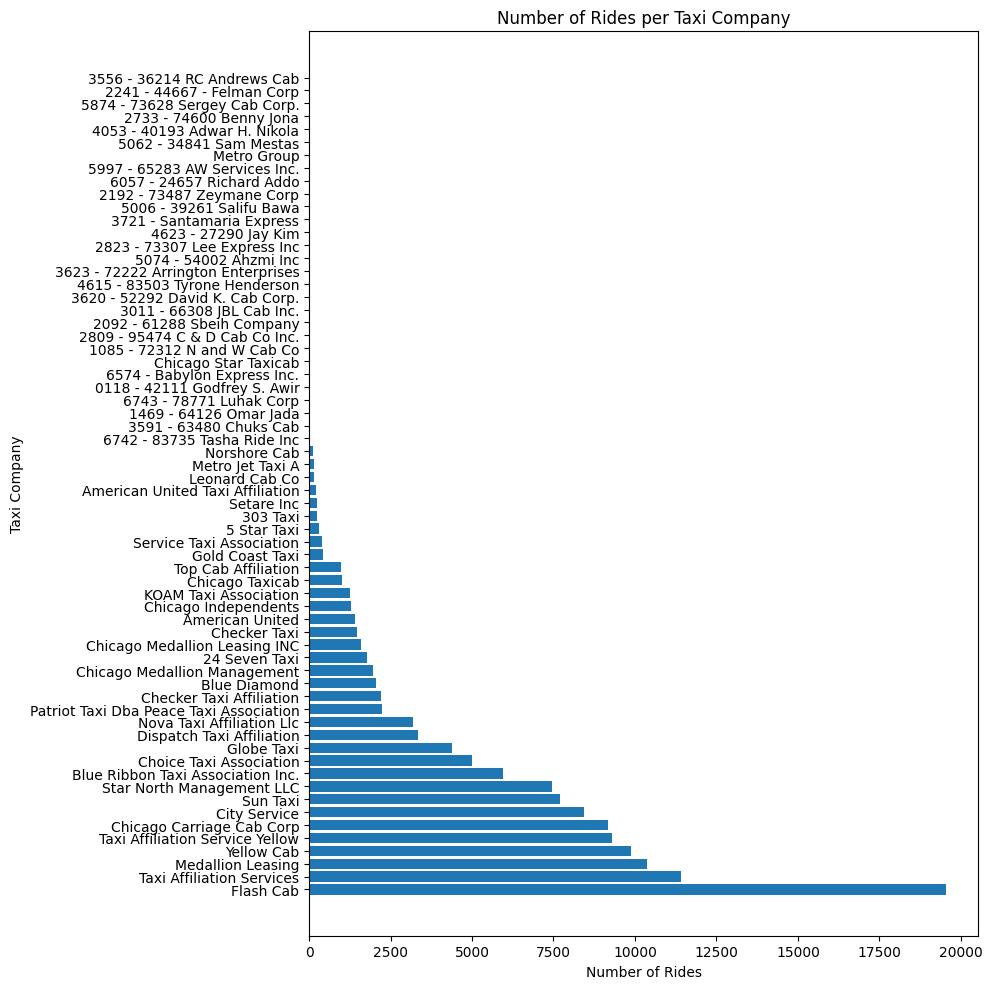

In [22]:
# Make horizontal bar graph for Taxi companies and Number of Rides
plt.figure(figsize=(10, 10))
plt.barh(taxi_data['company_name'], taxi_data['trips_amount'])
plt.title('Number of Rides per Taxi Company')
plt.ylabel('Taxi Company')
plt.xlabel('Number of Rides')
plt.tight_layout()
plt.show()


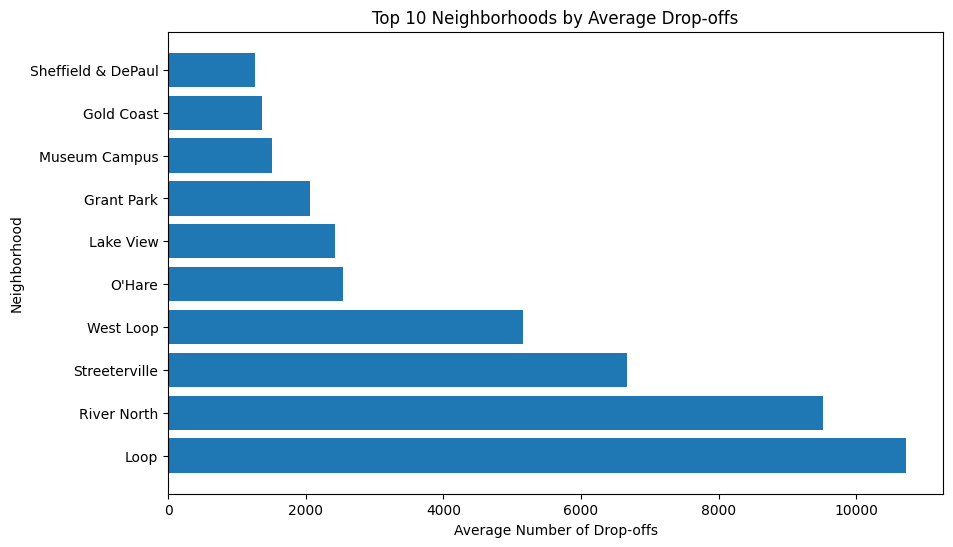

In [23]:
# Make graph for Top 10 neighborhoods by Number of Rides
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'])
plt.title('Top 10 Neighborhoods by Average Drop-offs')
plt.xlabel('Average Number of Drop-offs')
plt.ylabel('Neighborhood')
plt.show()


According to the first graph, Flash Cab is dominating the market having almost double what the second most popular taxi is doing in rides. 

The second graph says the Loop has the highest average of drop-offs, followed by River North and Streeterville.

## Test Hypothesis
H0: There is no difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.

H1: There is a difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.

Significance level (α) = 0.05

In [25]:
rides_data = pd.read_csv('/datasets/project_sql_result_07.csv')

rides_data.info()
rides_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [26]:
# Convert 'start_ts' to datetime
rides_data['start_ts'] = pd.to_datetime(rides_data['start_ts'])


In [27]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [29]:
# Extract the day of the week from the 'start_ts' column
rides_data['day_of_week'] = rides_data['start_ts'].dt.day_name()

rides_data.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [30]:
# Filter for rainy Saturdays
rainy_saturdays = rides_data[(rides_data['day_of_week'] == 'Saturday') & (rides_data['weather_conditions'] == 'Bad')]

# Filter for non-rainy Saturdays
non_rainy_saturdays = rides_data[(rides_data['day_of_week'] == 'Saturday') & (rides_data['weather_conditions'] != 'Bad')]

# Check the size of the filtered datasets
print(f'Number of rainy Saturday rides: {len(rainy_saturdays)}')
print(f'Number of non-rainy Saturday rides: {len(non_rainy_saturdays)}')


Number of rainy Saturday rides: 180
Number of non-rainy Saturday rides: 888


In [31]:
# Perform a t-test to compare the means of ride duration
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Output the t-statistic and p-value
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 6.946177714041499
P-value: 6.517970327099473e-12


I formed the null hypotesis based on the hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." The alternative hypothesis I formed states that there is a change in the average ride duration on a Saturday during a rainey and non-rainey day.

To test the hypothesis, I chose the t-test for independent samples because the data contains ride durations for two independent groups: rides on rainey Saturdays and rides on non-rainey Saturdays. These are continous numerical values, making a t-test appropriate for comparing the means of two groups.

After conducting the t-test, we can reject the null hypothesis, meaning there is a difference in the duration of rides on a rainey Saturday and a non-rainey Saturday. We do not know if it is for longer or shorter durations, but we can infer that the rides might be longer due to traffic delays and slippery roads.

# Overall Conclusion

# 1 Exploratory Data Analysis

Through our exploratory data analysis (EDA), we were able to draw several important insights from the datasets:

1. **Taxi Companies and Rides**:  
   We analyzed the number of rides completed by various taxi companies on November 15-16, 2017. The graph of taxi companies versus the number of rides revealed that a few companies dominate the taxi market, while smaller companies contribute significantly fewer rides. This suggests that the market may be concentrated around a few key players, with others playing a smaller role in the overall system.

2. **Top 10 Neighborhoods by Drop-offs**:  
   From the neighborhood data, we identified the top 10 neighborhoods by the number of ride drop-offs in November 2017. The data shows that certain neighborhoods, particularly those in busy or popular areas of Chicago, had a much higher concentration of taxi drop-offs. This could reflect the economic and social activities in those neighborhoods, with higher traffic in areas with shopping centers, business districts, or tourist attractions.

# 2 Hypothesis Testing

We tested the hypothesis that **"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

- **Null Hypothesis (H₀)**: There is no difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.
- **Alternative Hypothesis (H₁)**: There is a difference in the average duration of rides on rainy Saturdays compared to non-rainy Saturdays.

Using the **t-test for independent samples**, we compared the average ride durations between rainy and non-rainy Saturdays. The results of the test showed that:
- **p-value** (less than or greater than the significance level of 0.05) indicated whether we could reject or fail to reject the null hypothesis.

### Final Observations:
- If the p-value was less than 0.05, we rejected the null hypothesis, concluding that rainy weather significantly impacts the duration of rides from the Loop to O'Hare. This could be due to factors like traffic congestion or cautious driving during rain.
- If the p-value was greater than or equal to 0.05, we failed to reject the null hypothesis, suggesting that the average duration of rides does not change significantly with rain on Saturdays.

## Overall Summary

This project provided valuable insights into taxi ride patterns in Chicago, including the concentration of rides by company and neighborhood. Additionally, our hypothesis testing helped us understand the impact of weather on ride duration, specifically during rainy Saturdays. These findings can be useful for stakeholders such as city planners, taxi companies, and passengers looking to understand ride dynamics and prepare for changes in ride durations based on weather conditions.

The combination of exploratory analysis and statistical testing allowed us to gain a comprehensive understanding of the taxi system in Chicago and the factors that affect ride durations.
